In [ ]:
# ..... get subset of data from devCellPy paper ..... #

In [5]:
library(Seurat)
library(dplyr)

In [3]:
sc = readRDS('cardiac_atlas_seurat_object.rds')
sc

An object of class Seurat 
30439 features across 104199 samples within 1 assay 
Active assay: RNA (30439 features, 0 variable features)
 2 dimensional reductions calculated: mnn, umap

In [6]:
head(sc@meta.data)

orig.ident          nCount_RNA nFeature_RNA Batch       
AAACCTGGTAACGTTC-1_1_1 deSoysa_e775_batch1 34788.84   5645         batch_e775_1
AAACCTGTCACAATGC-1_1_1 deSoysa_e775_batch1 25467.49   5093         batch_e775_1
AAACGGGTCTGCTGCT-1_1_1 deSoysa_e775_batch1 30598.78   5281         batch_e775_1
AAAGATGGTAGCGTAG-1_1_1 deSoysa_e775_batch1 32338.44   5367         batch_e775_1
AAAGATGGTCAAACTC-1_1_1 deSoysa_e775_batch1 31648.71   5312         batch_e775_1
AAAGCAAAGATACACA-1_1_1 deSoysa_e775_batch1 30512.23   5149         batch_e775_1
                       Paper        Timepoint percent.mt percent.ribo
AAACCTGGTAACGTTC-1_1_1 deSoysa_etal E7.75     1.728075   26.06534    
AAACCTGTCACAATGC-1_1_1 deSoysa_etal E7.75     2.066935   21.51578    
AAACGGGTCTGCTGCT-1_1_1 deSoysa_etal E7.75     1.673550   25.42519    
AAAGATGGTAGCGTAG-1_1_1 deSoysa_etal E7.75     1.952224   25.13131    
AAAGATGGTCAAACTC-1_1_1 deSoysa_etal E7.75     2.311660   26.54193    
AAAGCAAAGATACACA-1_1_1 deSoysa_etal E7.75     1.934050   25.67524    
                       Celltype1           Celltype2 Celltype3
AAACCTGGTAACGTTC-1_1_1 aSHF Progenitors    NA        NA       
AAACCTGTCACAATGC-1_1_1 FHF Progenitors     NA        NA       
AAACGGGTCTGCTGCT-1_1_1 Pharyngeal Mesoderm NA        NA       
AAAGATGGTAGCGTAG-1_1_1 aSHF Progenitors    NA        NA       
AAAGATGGTCAAACTC-1_1_1 Pharyngeal Mesoderm NA        NA       
AAAGCAAAGATACACA-1_1_1 Pharyngeal Mesoderm NA        NA

In [5]:
table(sc$Timepoint)


             E10.5              E13.5              E16.5               E6.5 
             10095              19210              29245               2661 
             E6.75               E7.0              E7.25               E7.5 
              1340               9922               8833               2687 
             E7.75               E8.0              E8.25              E9.25 
              4497                  3               4639               8059 
mixed_gastrulation 
              3008 

In [7]:
sc1 <- sc[,sc$Timepoint %in% c('E9.25', 'E10.5', 'E13.5')]
sc1

An object of class Seurat 
30439 features across 37364 samples within 1 assay 
Active assay: RNA (30439 features, 0 variable features)
 2 dimensional reductions calculated: mnn, umap

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



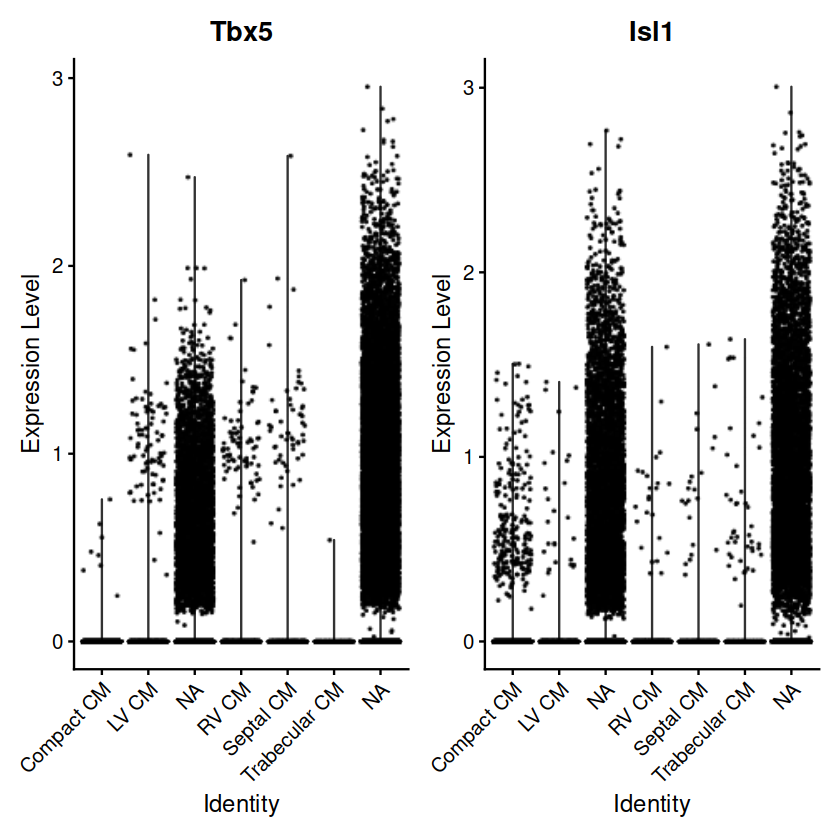

In [10]:
VlnPlot(sc, features = c('Tbx5', 'Isl1'), group.by = 'Celltype3')

In [8]:
table(sc1@meta.data$Celltype3)


    LV CM        NA     RV CM Septal CM 
     1535     10537      1815      1338 

In [9]:
# save E9.25-E13.5 data
saveRDS(sc1, file = 'mouse_devCellPy_E9.25_E13.5.rds')

In [14]:
sum(!is.na(sc@meta.data$Celltype1))

[1] 104199

In [15]:
table(sc@meta.data$Paper[sc@meta.data$Celltype3=='Septal CM'])


  deSoysa_etal Hill_etal_2019 
           498           1253 